# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Clayton Seabaugh
### GitHub Repo: https://github.com/ClaytonSeabaughGH/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests

# URL of the article
url = "https://resources.audiense.com/en/blog/how-big-data-has-changed-the-music-industry-forever"

# Fetch the HTML content of the webpage
response = requests.get(url)
html_content = response.text

# Save the HTML content to a file
with open("how_big_data_changed_music.html", "w", encoding="utf-8") as file:
    file.write(html_content)

print("HTML content saved to how_big_data_changed_music.html")


HTML content saved to how_big_data_changed_music.html


### Question 2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [7]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import re


# Step 1: Read the HTML file
with open("how_big_data_changed_music.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Step 2: Extract text from the HTML
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Step 3: Perform sentiment analysis
blob = TextBlob(article_text)
polarity = blob.polarity  # Sentiment polarity
# Step 1: Extract text from HTML as before (assuming article_text is already defined)
# Step 2: Count sentences using regex
sentence_count = len(re.split(r'[.!?]', article_text)) - 1  # Subtract 1 to handle trailing splits

# Step 3: Print the results
print(f"Number of Sentences: {sentence_count}")

# Step 4: Print results
print(f"Polarity Score: {polarity:.2f}")



Number of Sentences: 72
Polarity Score: 0.14


### Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [9]:
import spacy
from collections import Counter

# Step 1: Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure spaCy and the model are installed

# Step 2: Process the article text
doc = nlp(article_text)

# Step 3: Tokenize and count token frequencies (lowercase, no punctuation or stop words)
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]
token_freq = Counter(tokens)

# Step 4: Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Step 5: Print results
print("Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Most Frequent Tokens:
Token: '
', Frequency: 115
Token: '

', Frequency: 46
Token: 'audience', Frequency: 28
Token: 'audiense', Frequency: 26
Token: 'intelligence', Frequency: 26


### Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [10]:
import spacy
from collections import Counter

# Step 1: Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure spaCy and the model are installed

# Step 2: Process the article text
doc = nlp(article_text)

# Step 3: Extract lemmas and count frequencies (convert to lower case, excluding punctuation and stop words)
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]
lemma_freq = Counter(lemmas)

# Step 4: Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Step 5: Print results
print("Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Most Frequent Lemmas:
Lemma: '
', Frequency: 115
Lemma: '

', Frequency: 46
Lemma: 'audience', Frequency: 32
Lemma: 'artist', Frequency: 30
Lemma: 'audiense', Frequency: 26


### Question 5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

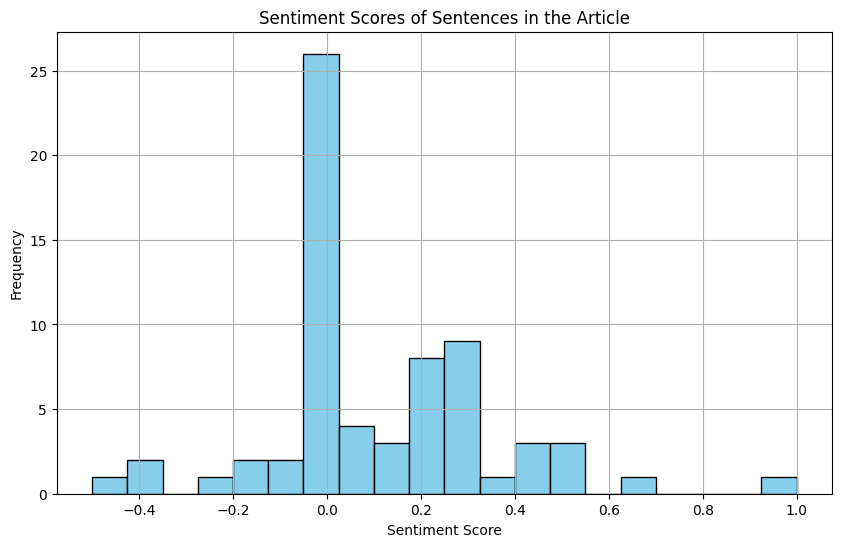

In [ ]:
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob

# Step 1: Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure spaCy and the model are installed

# Step 2: Process the article text with spaCy
doc = nlp(article_text)

# Step 3: Calculate sentiment scores for each sentence using TextBlob
sentence_scores = []

for sent in doc.sents:
    # Get sentence text
    sentence_text = sent.text.strip()
    
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(sentence_text)
    sentence_scores.append(blob.sentiment.polarity)

# Step 4: Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Scores of Sentences in the Article')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The most common range of scores is from 0 to .3


### Question 6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

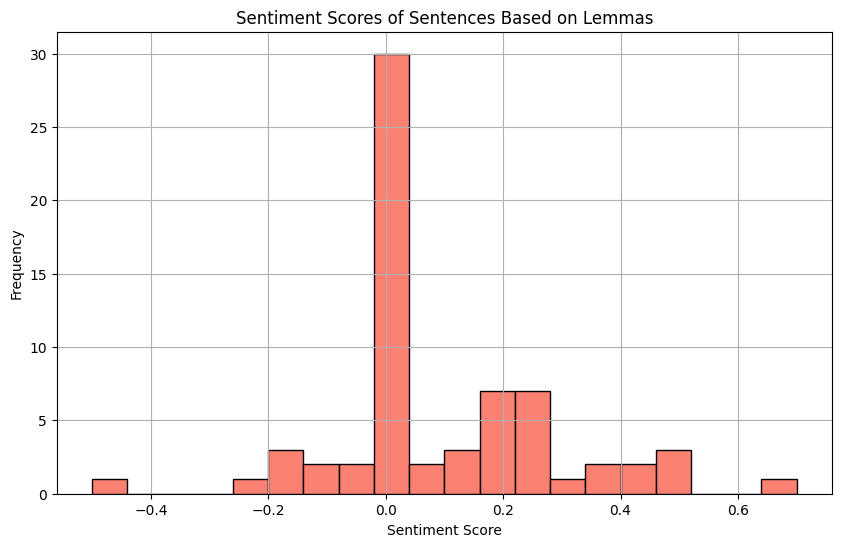

In [ ]:
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob

# Step 1: Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure spaCy and the model are installed

# Step 2: Process the article text with spaCy
doc = nlp(article_text)

# Step 3: Calculate sentiment scores for each sentence using lemmas
sentence_scores_lemmas = []

for sent in doc.sents:
    # Extract lemmas (convert to lowercase, exclude punctuation and stop words)
    sentence_lemmas = [token.lemma_.lower() for token in sent if not token.is_punct and not token.is_stop]
    
    # Create a TextBlob object for the sentence's lemmas (concatenate lemmas into a string)
    sentence_text = " ".join(sentence_lemmas)
    blob = TextBlob(sentence_text)
    
    # Store the sentiment polarity
    sentence_scores_lemmas.append(blob.sentiment.polarity)

# Step 4: Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_lemmas, bins=20, color='salmon', edgecolor='black')
plt.title('Sentiment Scores of Sentences Based on Lemmas')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The most common range of scores is from 0 to .3


### Question 7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): .2
* Cutoff Score (lemmas): .2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [14]:
import numpy as np

# Step 1: Calculate the median of sentiment scores for tokens and lemmas
cutoff_score_tokens = np.median(sentence_scores)
cutoff_score_lemmas = np.median(sentence_scores_lemmas)

# Step 2: Print the cutoff scores
print(f"Cutoff Score (tokens): {cutoff_score_tokens:.2f}")
print(f"Cutoff Score (lemmas): {cutoff_score_lemmas:.2f}")


Cutoff Score (tokens): 0.01
Cutoff Score (lemmas): 0.00


### Question 8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

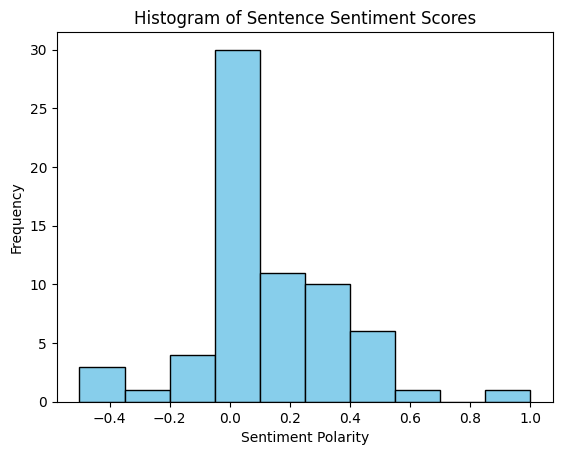


Summary of the Article:
Go to Soprism >


Social Intelligence
Uncover social consumer segments that are derived from consumer behaviour “in the wild” to reflect real affinities. Go to Audiense Demand >



X Marketing

Community Management
Access the most complete X community management tool with deep follower analytics. Go to Audiense Connect >


X Advanced Analytics & Tracking
Gain access to the X analytics tool used by top agencies and marketers around the world, tracking thousands of hashtags daily. To stay ahead, music labels need to be able to navigate the ever-changing preferences of listeners and harness those insights to generate new revenue streams. This data is what gives the music industry a head start when it comes to understanding what you are listening to, where you are from, when you listen, how, and how frequently you listen to a song or genre. Then there is social media, which has also had a major impact on the type of data music labels can analyze because now you can

In [8]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy
import matplotlib.pyplot as plt

# Step 1: Extract the article text
with open("how_big_data_changed_music.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text().strip()  # Clean the extracted text

# Step 2: Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Ensure spaCy model is installed

# Step 3: Process the article with spaCy
doc = nlp(article_text)

# Step 4: Calculate sentiment scores for each sentence
sentence_scores = []
for sent in doc.sents:
    blob = TextBlob(sent.text)
    sentence_scores.append(blob.sentiment.polarity)

# Step 5: Plot a histogram of sentiment scores (optional debugging)
plt.hist(sentence_scores, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Sentence Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# Step 6: Define a cutoff score for tokens (based on Question 7)
cutoff_score_tokens = 0.05  # Adjust based on your histogram analysis

# Step 7: Summarize the article based on the cutoff score
summary_sentences = []
for sent, score in zip(doc.sents, sentence_scores):
    if score > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())  # Add sentence to summary list

# Step 8: Generate the summary
summary_text = ' '.join(summary_sentences)

# Step 9: Print the summary
print("\nSummary of the Article:")
print(summary_text)


### Question 9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
# Step 1: Use spaCy to count sentences in the summary
summary_doc = nlp(summary_text)  # Process the summary text with spaCy
spaCy_sentence_count = len(list(summary_doc.sents))  # Count sentences in the summary

# Step 2: Print the polarity score and sentence count
print(f"Polarity Score of the Summary: {summary_polarity:.2f}")
print(f"Number of Sentences in the Summary (using spaCy): {spaCy_sentence_count}")


Polarity Score of the Summary: 0.26
Number of Sentences in the Summary (using spaCy): 31


### Question 10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [12]:
# Step 1: Define the cutoff score for lemmas (based on Question 7)
cutoff_score_lemmas = 0.1  # Replace with the actual cutoff score for lemmas

# Step 2: Initialize an empty list for the summary sentences
summary_sentences_lemmas = []

# Step 3: Loop through each sentence in the article
for sent, score in zip(doc.sents, sentence_scores):  # `sentence_scores` should already exist for lemma scores
    if score > cutoff_score_lemmas:  # Compare score to cutoff
        summary_sentences_lemmas.append(sent.text.strip())  # Add sentence to summary list

# Step 4: Generate the summary by joining the sentences
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Step 5: Print the summary
print("\nSummary of the Article (based on lemmas):")
print(summary_text_lemmas)



Summary of the Article (based on lemmas):
Go to Audiense Demand >



X Marketing

Community Management
Access the most complete X community management tool with deep follower analytics. Go to Audiense Connect >


X Advanced Analytics & Tracking
Gain access to the X analytics tool used by top agencies and marketers around the world, tracking thousands of hashtags daily. To stay ahead, music labels need to be able to navigate the ever-changing preferences of listeners and harness those insights to generate new revenue streams. With all this data and insight available, we wanted to filter down the top things that big data can help music labels discover: According to analysts, this is what makes it easy to predict who will blow up next. Chartmetric, for example, can predict which of the 1.7 million musicians it follows will experience a significant career breakthrough in the upcoming week. Next Big Sound (owned by Pandora), claims that their unique algorithm can foretell which artist will

### Question 11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [13]:
from textblob import TextBlob

# Step 1: Perform sentiment analysis on the lemma-based summary
summary_blob_lemmas = TextBlob(summary_text_lemmas)  # Convert the lemma-based summary to a TextBlob object
summary_polarity_lemmas = summary_blob_lemmas.sentiment.polarity  # Get the polarity score
summary_sentence_count_lemmas = len(list(nlp(summary_text_lemmas).sents))  # Count sentences using spaCy

# Step 2: Print the results
print(f"Polarity Score of the Lemma-Based Summary: {summary_polarity_lemmas:.2f}")
print(f"Number of Sentences in the Lemma-Based Summary: {summary_sentence_count_lemmas}")


Polarity Score of the Lemma-Based Summary: 0.29
Number of Sentences in the Lemma-Based Summary: 27


### Question 12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

- The summary polarity score is a lot higher than the initial article. 
- I think that there may be a difference because summaries are designed to emphasize significant sentences which may have a stronger sentiment
- The cutoff score also could have attributed to this

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?